# 📊 Customer Churn Prediction Project

This notebook walks through the steps of understanding and predicting customer churn using Python, Pandas, Matplotlib, and Scikit-learn. We'll explore the data, clean it, visualize key trends, train models, and finally deploy a prediction app.


In [1]:
# imports
import pandas as pd

## 🔍 Step 1: Load and Inspect the Dataset
We begin by reading in the dataset and viewing the first few rows.

In [2]:
df = pd.read_csv("customer_churn_data.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.tail()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes
999,1000,50,Male,1,56.67,Month-to-Month,NaN,56.67,No,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


## Step 2: Handling Missing Data
We'll check for null values and fill or clean them as needed.

In [6]:
#NaN values
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [7]:
#fill NA values instad of dropping them
df["InternetService"]

0      Fiber Optic
1      Fiber Optic
2      Fiber Optic
3              DSL
4              NaN
          ...     
995    Fiber Optic
996            NaN
997    Fiber Optic
998            NaN
999            NaN
Name: InternetService, Length: 1000, dtype: object

In [8]:
df["InternetService"] = df["InternetService"].fillna("None")

In [9]:
df.isna().sum().sum()

0

In [10]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,None,2208.32,No,Yes


## Step 3: Exploratory Data Analysis (EDA)
Let's explore our data distributions and spot any trends or patterns related to customer churn.

In [11]:
#there are no duplicates to drop
df.duplicated().sum()

0

In [12]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [13]:
numeric_columns_data = df.select_dtypes( include = ["number"])
numeric_columns_data

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [14]:
#corrolation
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [15]:
#data visualization
df["Churn"].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

In [16]:
type(df["Churn"].value_counts())

pandas.core.series.Series

In [17]:
import matplotlib.pyplot as plt

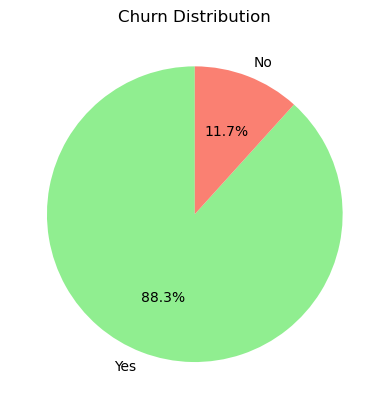

In [75]:
df["Churn"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["lightgreen", "salmon"])
plt.title("Churn Distribution")
plt.ylabel("")
plt.show()

In [19]:
#Grouping data
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [20]:
df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [21]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [22]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

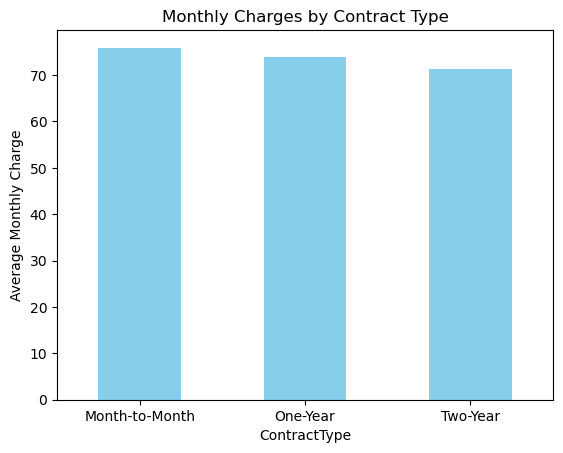

In [76]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar", color="skyblue")
plt.ylabel("Average Monthly Charge")
plt.title("Monthly Charges by Contract Type")
plt.xticks(rotation=0)
plt.show()
#At the lower terms, we can see that the monthly charge average decreases

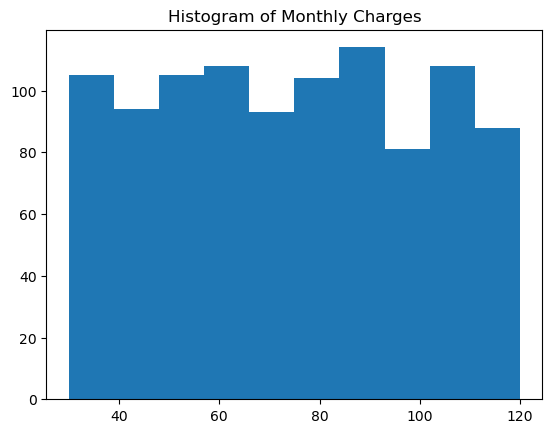

In [24]:
#histogram
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.show()

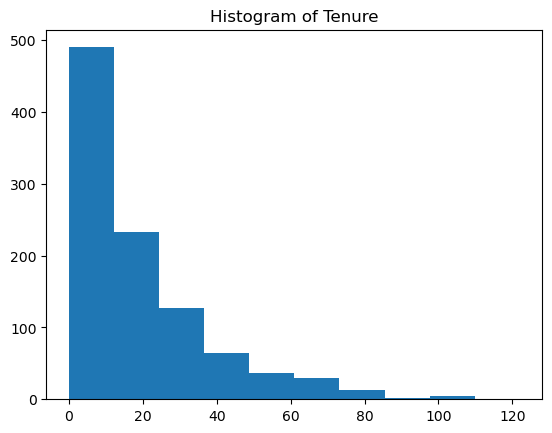

In [25]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()


In [26]:
#feature engineering
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [27]:
y = df[["Churn"]]
X = df[["Age", "Gender", "Tenure", "MonthlyCharges"]]

In [28]:
X #1 Female 0 Male

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [29]:
X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)

/var/folders/q6/fy7c_6hn5jd13vg8yr4qxqkw0000gn/T/ipykernel_2856/2388402656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)


In [30]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [31]:
type(X["Gender"][0])

numpy.int64

In [32]:
y.head(2)

,Churn
0,Yes
1,Yes


In [33]:
y["Churn"] = y["Churn"].apply(lambda x:1 if x == "Yes" else 0)

/var/folders/q6/fy7c_6hn5jd13vg8yr4qxqkw0000gn/T/ipykernel_2856/3104515624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] = y["Churn"].apply(lambda x:1 if x == "Yes" else 0)


In [34]:
type(y["Churn"][0])

numpy.int64

## 🤖 Step 4: Model Training & Evaluation
We’ll split the data, train a logistic regression model, and evaluate its performance.
### Model Evaluation Metrics
We’ll use accuracy, confusion matrix, and classification report to evaluate the model.


In [35]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [36]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [37]:
#export scaler
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [38]:
X_test = scaler.fit_transform(X_test)
#now both X_train and X_test are scaled

In [39]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy score on model is: {}".format(accuracy_score(y_test, predictions)))

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
log_model = LogisticRegression()

In [43]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [44]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [45]:
log_model.predict([[40, 0, 20, 80]])[0]

1

In [46]:
y_pred = log_model.predict(X_test)
modelperformance(y_pred)

Accuracy score on model is: 0.87


In [47]:
#using k-neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

In [48]:
param_grid = {
    "n_neighbors" : [3, 5, 7, 9] ,
    "weights" : ["uniform", "distance"]
 }

In [49]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

In [50]:
gridkn.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [51]:
gridkn.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [52]:
y_pred = gridkn.predict(X_test)

In [53]:
modelperformance(y_pred)

Accuracy score on model is: 0.88


In [54]:
from sklearn.svm import SVC

In [55]:
svm = SVC()

In [56]:
param_grid = {
    "C" : [0.01, 0.1, 0.5, 1],
    "kernel" : ["linear", "rbf", "poly"]
}

In [57]:
gridsvc = GridSearchCV(svm, param_grid, cv = 5)
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [58]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [59]:
y_pred = gridsvc.predict(X_test)
modelperformance(y_pred)

Accuracy score on model is: 0.87


In [60]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

grid_tree = GridSearchCV( DecisionTreeClassifier(), param_grid, cv = 5)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [61]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [62]:
y_pred = grid_tree.predict(X_test)

In [63]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [64]:
modelperformance(y_pred)

Accuracy score on model is: 0.83


In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [66]:
param_grid = {
    "n_estimators" : [32, 64, 128, 256],
    "max_features" : [2, 3, 4],
    "bootstrap" : [True, False]
}

In [67]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv = 5)

In [68]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [69]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 32}

In [70]:
y_pred = grid_rfc.predict(X_test)

In [71]:
modelperformance(y_pred)

Accuracy score on model is: 0.805


## 💾 Step 5: Exporting Model for Deployment
Once satisfied with performance, we’ll export the model and scaler for use in our Streamlit app.


In [72]:
best_model = gridsvc.best_estimator_

In [73]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

In [74]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')